# PERSONALIZED MEDICINE RECOMMENDATION SYSTEM


INTRODUCTION

A Medicine Recommendation System is a Machine Learning model that can assist healthcare professionals in prescribing the right medication to patients based on their medical conditions, symptoms, allergies, and other relevant factors. It can help healthcare professionals in prescribing the right medication to their patients, reducing the risk of adverse effects and improving patient outcomes.

In [1]:
#Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset
Medicine = pd.read_csv(r'C:\Users\dell\Downloads\medicine.csv')
Medicine.head()

,index,Drug_Name,Reason,Description
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


In [3]:
#Shape of the dataset
Medicine.shape

(9720, 4)

In [4]:
#info about the data
Medicine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        9720 non-null   int64 
 1   Drug_Name    9720 non-null   object
 2   Reason       9720 non-null   object
 3   Description  9720 non-null   object
dtypes: int64(1), object(3)
memory usage: 303.9+ KB


In [5]:
#Summary 
Medicine.describe()

,index
count,9720.000000
mean,4860.500000
std,2806.066642
min,1.000000
25%,2430.750000
50%,4860.500000
75%,7290.250000
max,9720.000000


In [6]:
Medicine.isnull().sum()

index          0
Drug_Name      0
Reason         0
Description    0
dtype: int64

In [7]:
Medicine['Description']

0                           Mild to moderate acne (spots)
1       A RET 0.025% is a prescription medicine that i...
2       It is used to treat acne vulgaris in people 12...
3       It is used to treat acne vulgaris in people 12...
4       treat the most severe form of acne (nodular ac...
                              ...                        
9715                              used for treating warts
9716                        used to soften the skin cells
9717                                       used for scars
9718                                      used for wounds
9719    used to treat and remove raised warts (usually...
Name: Description, Length: 9720, dtype: object

In [8]:
Medicine['Reason']

0        Acne
1        Acne
2        Acne
3        Acne
4        Acne
        ...  
9715    Wound
9716    Wound
9717    Wound
9718    Wound
9719    Wound
Name: Reason, Length: 9720, dtype: object

# EDA

Text(0.5, 1.0, 'Top10 : The number of drugs per condition.')

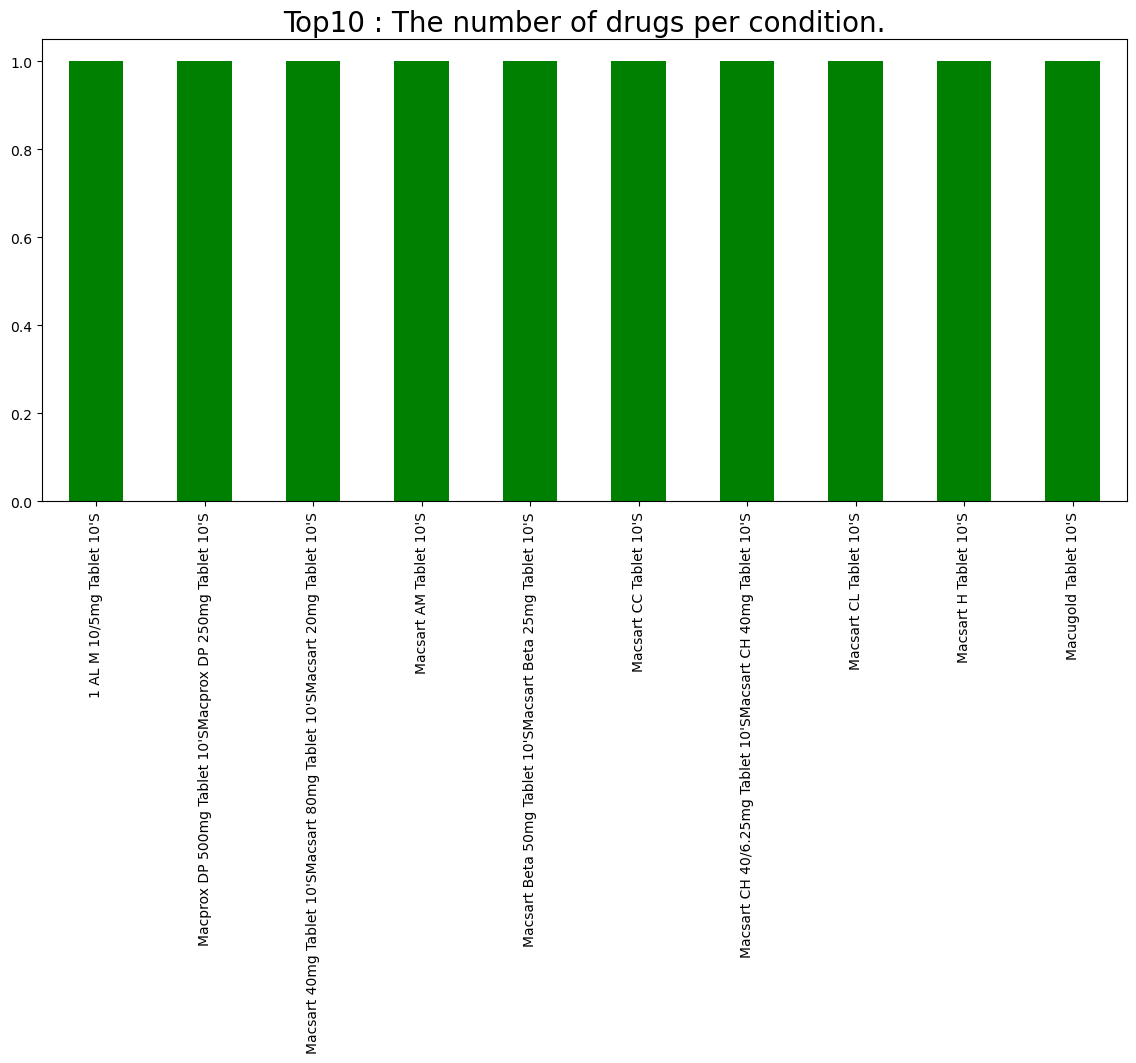

In [9]:
#ploting bar Graph for Drug_Name and Reason
condition_dn = Medicine.groupby(['Drug_Name'])['Reason'].nunique().sort_values(ascending=False)
condition_dn[0:10].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top10 : The number of drugs per condition.", fontsize = 20)

Dataset has 9626 unique groups
********************
And the top 10 counts are :
Wounsol Ointment 15gm                                                                                                                               2
Zidovudine 300mg Tablet 10'S                                                                                                                        2
Zimivir 1000mg Tablet 3'SZimivir 500mg Tablet 3'S                                                                                                   2
Zosovir 400mg Tablet 28'S                                                                                                                           2
Zoster 800mg Tablet 10'SZoster 5% Cream 5gmZoster 400mg Tablet 10'S                                                                                 2
Zovilam Tablet 60'S                                                                                                                                 2
Zovirax 250mg Inject

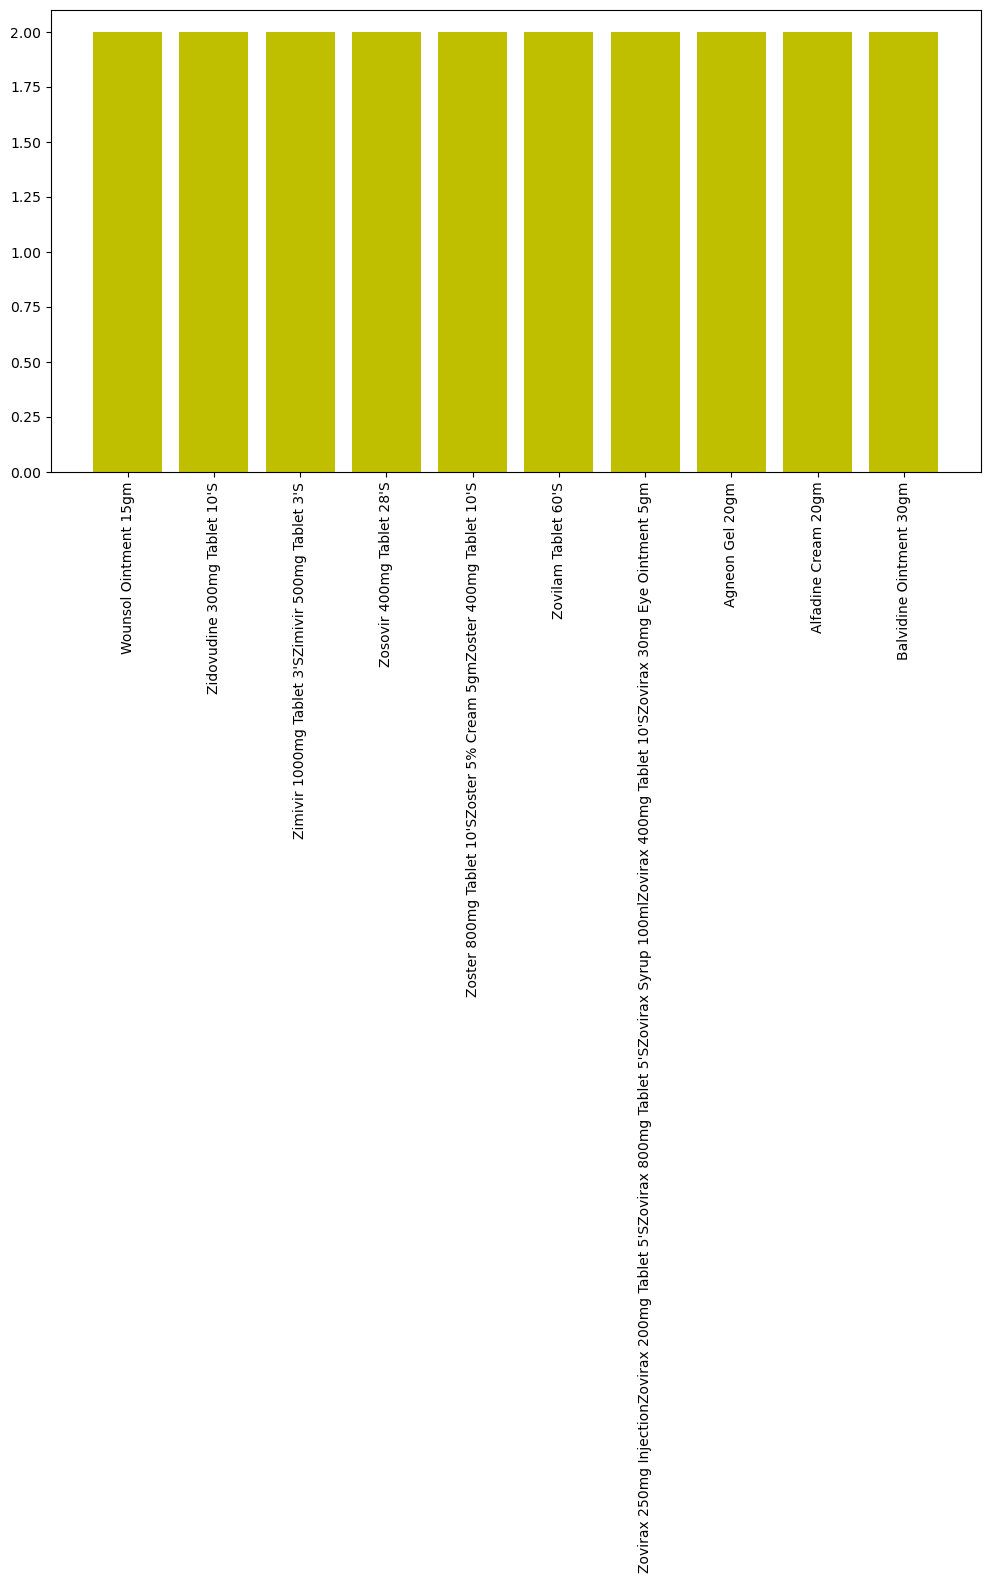

In [10]:
#ploting unique Drug names
print(f'Dataset has {len(Medicine.Drug_Name.unique())} unique groups')
print('*'*20)
print(f'And the top 10 counts are :')
print(Medicine.Drug_Name.value_counts().head(10))
print('*'*20)

c = Medicine.Drug_Name.value_counts().head(10)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(c.index, c.values, width=0.8, color='y')
plt.xticks(rotation=90)
plt.show()

Dataset has 50 unique groups
********************
And the top 10 counts are :
Hypertension    2505
Infection       1109
Pain            1072
Fungal           509
Anaemia          252
General          243
Angina           219
Acne             204
Allergies        203
Glaucoma         197
Name: Reason, dtype: int64
********************


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

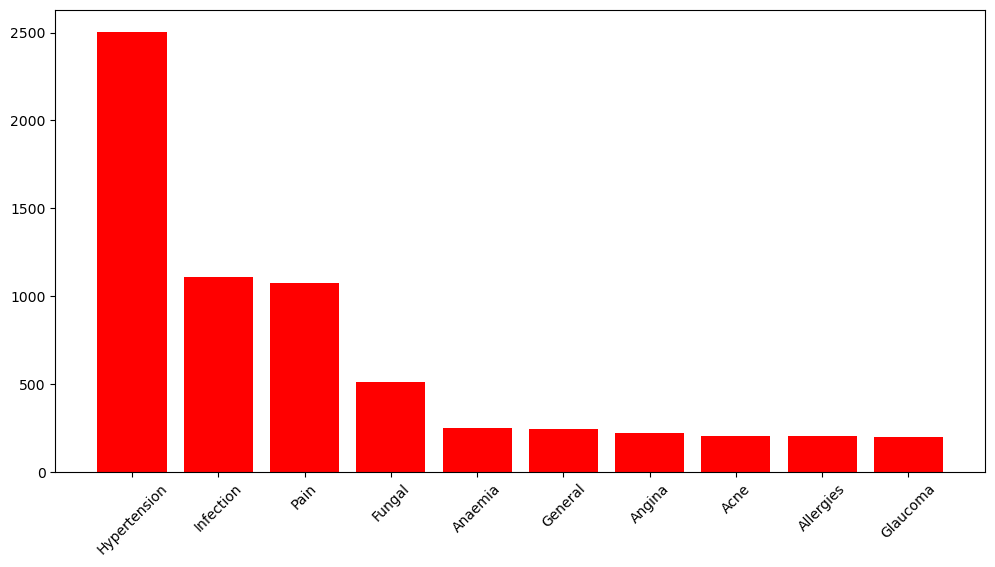

In [11]:
#ploting Unique Reasons from the data
print(f'Dataset has {len(Medicine.Reason.unique())} unique groups')
print('*'*20)
print(f'And the top 10 counts are :')
print(Medicine.Reason.value_counts().head(10))
print('*'*20)

c = Medicine.Reason.value_counts().head(10)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(c.index, c.values, width=0.8, color='r')
plt.xticks(rotation=45)

Dataset has 290 unique names
***************
And the top 10 counts are :
lower high blood pressure (hypertension)                                                                                                       578
lowerÂ chance of stroke in patients with high blood pressure and a heart problem called left ventricular hypertrophy (LVH)                     578
used for treating high blood pressure (essential hypertension) in adults                                                                       445
Â treat high blood pressure (hypertension) and a type of chest pain called angina                                                              444
slow the worsening of diabetic kidney disease (nephropathy) in patients with type 2 diabetes who have or had high blood pressure               241
infection during surgery                                                                                                                       186
urinaryÂ tract and kidneys                   

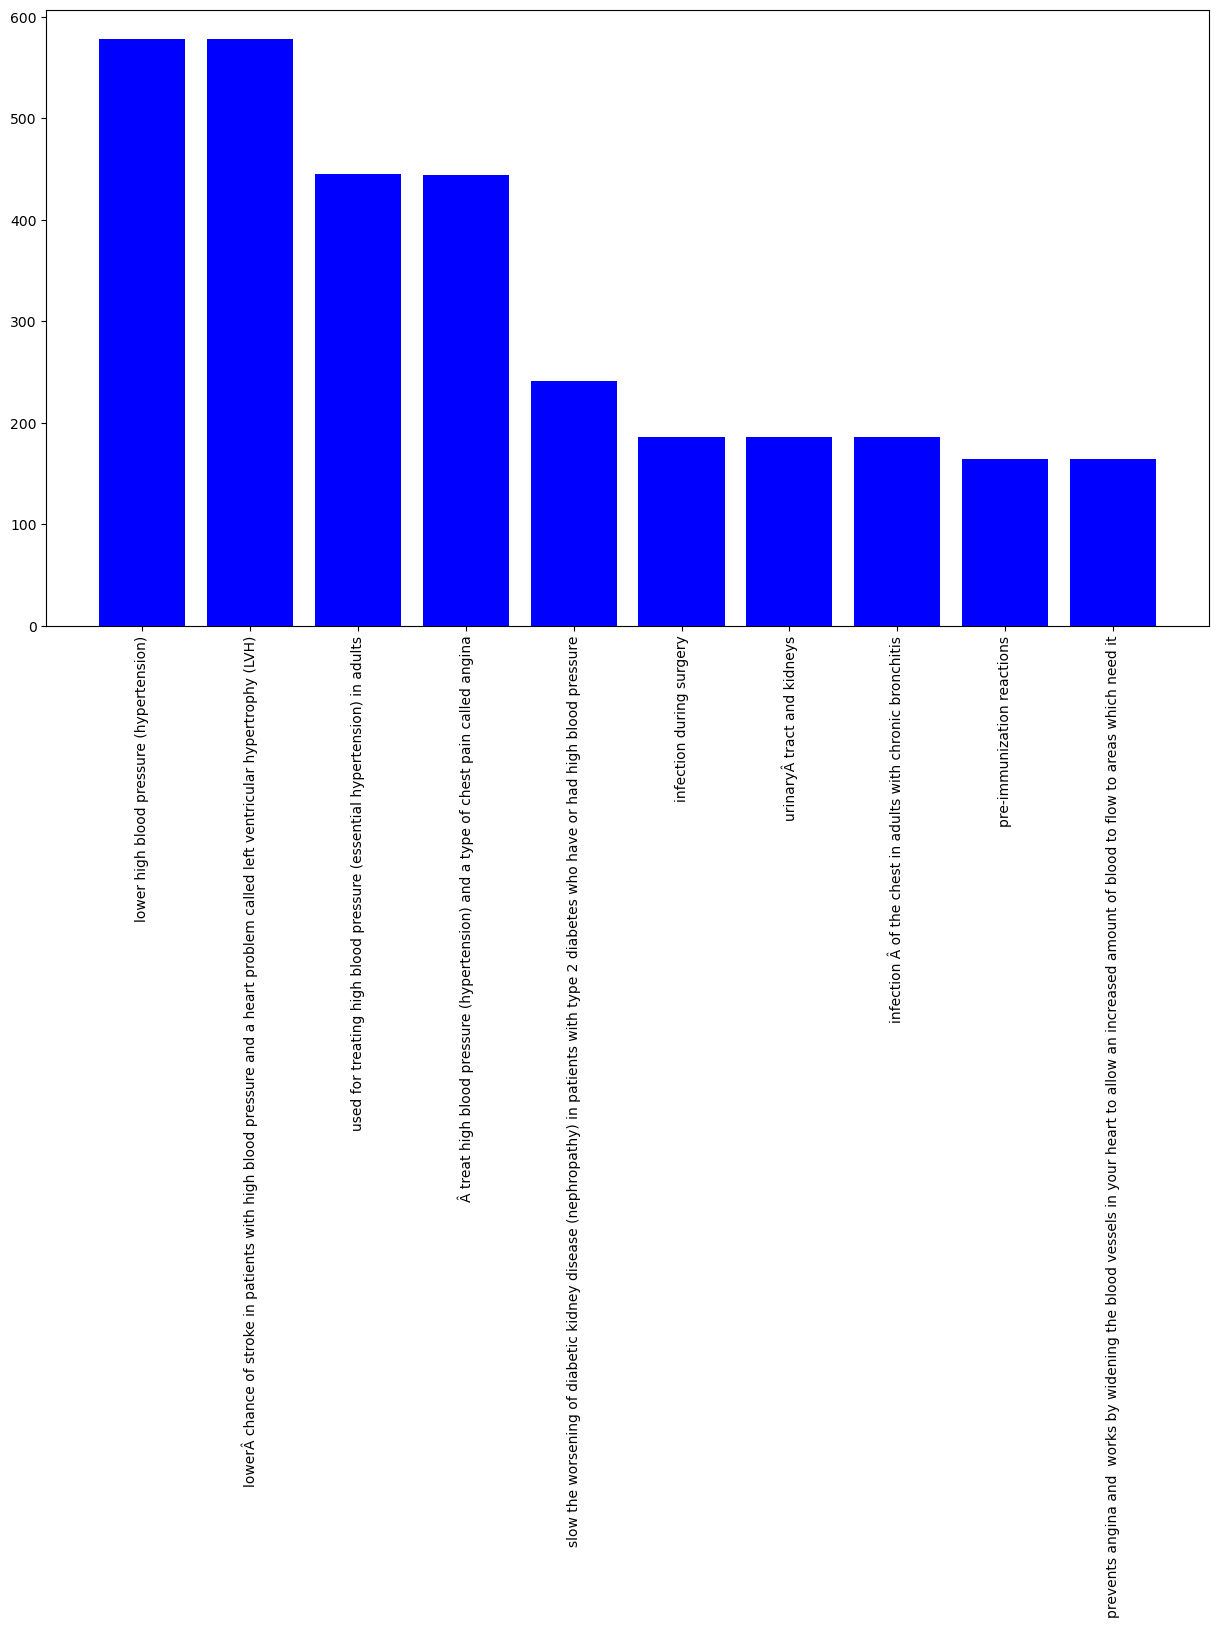

In [12]:
#ploting unique Description from the data
print(f'Dataset has {len(Medicine.Description.unique())} unique names')
print('*'*15)
print(f'And the top 10 counts are :')
print(Medicine.Description.value_counts().head(10))
print('*'*15)

c = Medicine.Description.value_counts().head(10)
fig, ax = plt.subplots(1,1,figsize=(15,8))
ax.bar(c.index, c.values, width=0.8, color='b')
plt.xticks(rotation=90)
plt.show()

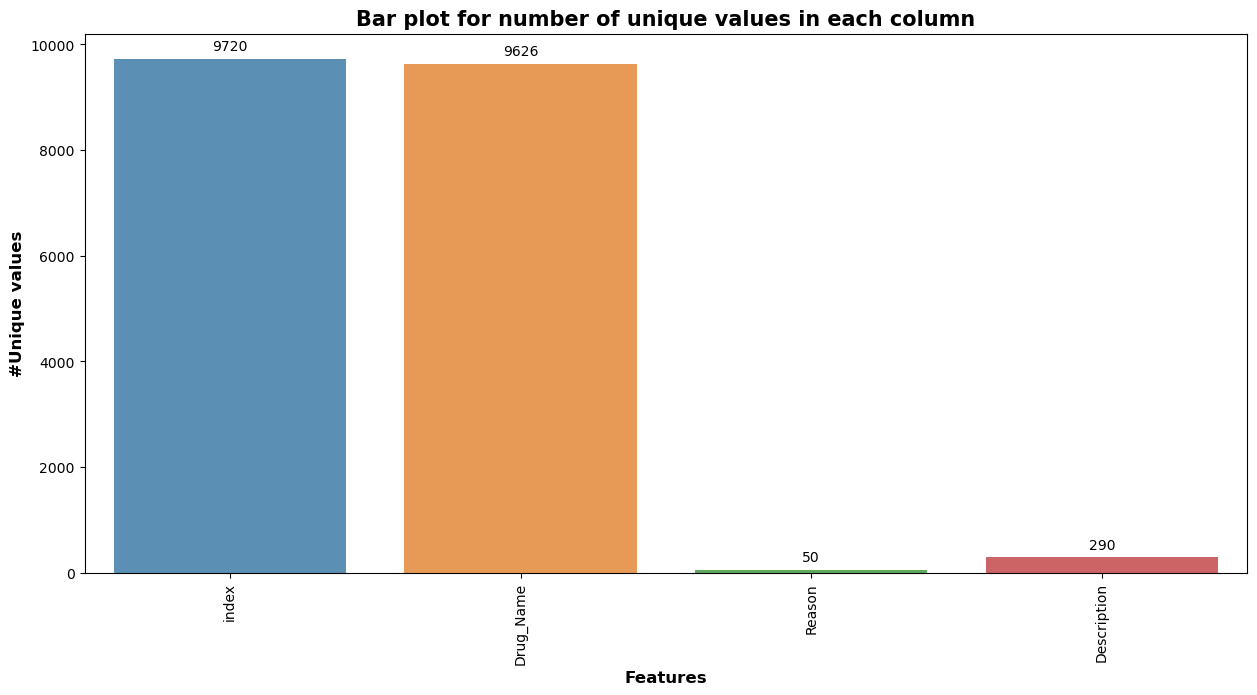

In [13]:
#ploting Barplot for each features in the dataset
unique_df = pd.DataFrame()
unique_df['Features'] = Medicine.columns
unique=[]
for i in Medicine.columns:
    unique.append(Medicine[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

#Performing NLTK 

In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


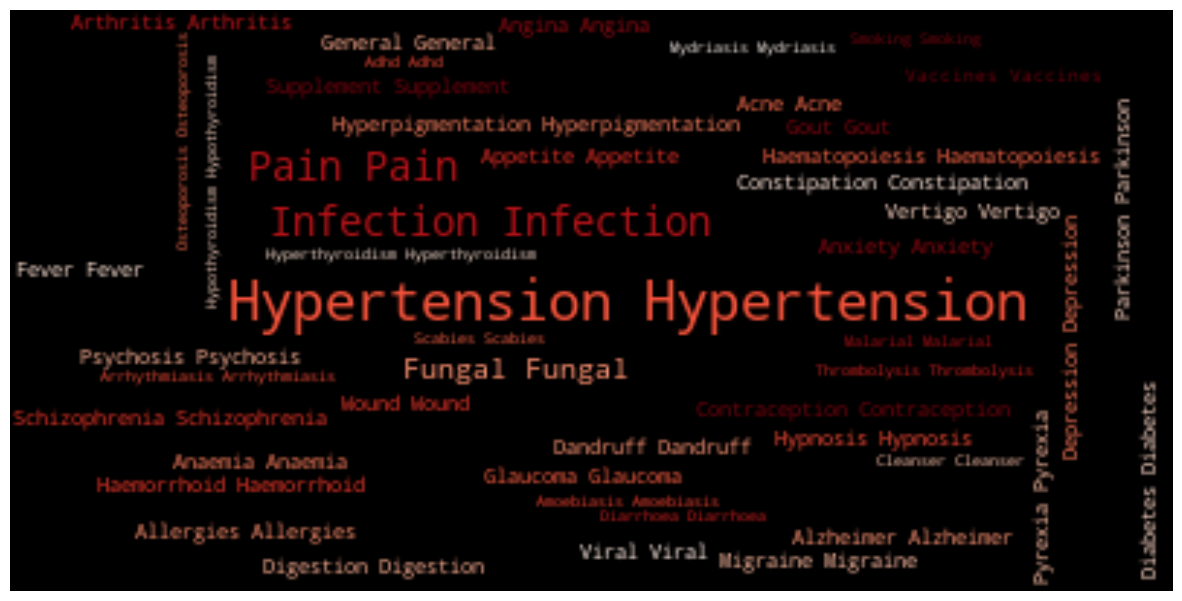

<Figure size 1000x600 with 0 Axes>

In [15]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in Medicine.Reason)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='Reds', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()


In [16]:
Medicine['Description'].apply(lambda x:x.split())

0                     [Mild, to, moderate, acne, (spots)]
1       [A, RET, 0.025%, is, a, prescription, medicine...
2       [It, is, used, to, treat, acne, vulgaris, in, ...
3       [It, is, used, to, treat, acne, vulgaris, in, ...
4       [treat, the, most, severe, form, of, acne, (no...
                              ...                        
9715                         [used, for, treating, warts]
9716                 [used, to, soften, the, skin, cells]
9717                                   [used, for, scars]
9718                                  [used, for, wounds]
9719    [used, to, treat, and, remove, raised, warts, ...
Name: Description, Length: 9720, dtype: object

In [17]:
Medicine['Reason'] = Medicine['Reason'].apply(lambda x:x.split())
Medicine['Description'] = Medicine['Description'].apply(lambda x:x.split())

In [18]:
Medicine['Description'] = Medicine['Description'].apply(lambda x:[i.replace(" ","") for i in x])

In [19]:
Medicine['tags'] = Medicine['Description'] + Medicine['Reason'] 

In [20]:
Medicine_df = Medicine[['index','Drug_Name','tags']]
Medicine_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,"[Mild, to, moderate, acne, (spots), Acne]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,"[treat, the, most, severe, form, of, acne, (no..."
...,...,...,...
9715,9716,T Muce Ointment 5gm,"[used, for, treating, warts, Wound]"
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,"[used, to, soften, the, skin, cells, Wound]"
9717,9718,Wokadine M Onit 10gm,"[used, for, scars, Wound]"
9718,9719,Wound Fix Solution 100ml,"[used, for, wounds, Wound]"


In [21]:
Medicine_df['tags'].apply(lambda x:" ".join(x))

0                      Mild to moderate acne (spots) Acne
1       A RET 0.025% is a prescription medicine that i...
2       It is used to treat acne vulgaris in people 12...
3       It is used to treat acne vulgaris in people 12...
4       treat the most severe form of acne (nodular ac...
                              ...                        
9715                        used for treating warts Wound
9716                  used to soften the skin cells Wound
9717                                 used for scars Wound
9718                                used for wounds Wound
9719    used to treat and remove raised warts (usually...
Name: tags, Length: 9720, dtype: object

In [22]:
Medicine_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,"[Mild, to, moderate, acne, (spots), Acne]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,"[treat, the, most, severe, form, of, acne, (no..."
...,...,...,...
9715,9716,T Muce Ointment 5gm,"[used, for, treating, warts, Wound]"
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,"[used, to, soften, the, skin, cells, Wound]"
9717,9718,Wokadine M Onit 10gm,"[used, for, scars, Wound]"
9718,9719,Wound Fix Solution 100ml,"[used, for, wounds, Wound]"


In [23]:
Medicine_df['tags'] = Medicine_df['tags'].apply(lambda x:" ".join(x))
Medicine_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Mild to moderate acne (spots) Acne
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,treat the most severe form of acne (nodular ac...
...,...,...,...
9715,9716,T Muce Ointment 5gm,used for treating warts Wound
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,used to soften the skin cells Wound
9717,9718,Wokadine M Onit 10gm,used for scars Wound
9718,9719,Wound Fix Solution 100ml,used for wounds Wound


In [24]:
Medicine_df['tags'] = Medicine_df['tags'].apply(lambda x:x.lower())
Medicine_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,mild to moderate acne (spots) acne
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,a ret 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,treat the most severe form of acne (nodular ac...
...,...,...,...
9715,9716,T Muce Ointment 5gm,used for treating warts wound
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,used to soften the skin cells wound
9717,9718,Wokadine M Onit 10gm,used for scars wound
9718,9719,Wound Fix Solution 100ml,used for wounds wound


In [25]:
import nltk

#using Stemming Methods (Porter_Stemmer)

In [26]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english',max_features=5000)

In [28]:
def stem(text):
    y = []

    for i in text.split():
         y.append(ps.stem(i))

    return " ".join(y) 

In [29]:
Medicine_df['tags'] = Medicine_df['tags'].apply(stem)
Medicine_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,mild to moder acn (spots) acn
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,a ret 0.025% is a prescript medicin that is us...
2,3,ACGEL CL NANO Gel 15gm,it is use to treat acn vulgari in peopl 12 yea...
3,4,ACGEL NANO Gel 15gm,it is use to treat acn vulgari in peopl 12 yea...
4,5,Acleen 1% Lotion 25ml,treat the most sever form of acn (nodular acne...
...,...,...,...
9715,9716,T Muce Ointment 5gm,use for treat wart wound
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,use to soften the skin cell wound
9717,9718,Wokadine M Onit 10gm,use for scar wound
9718,9719,Wound Fix Solution 100ml,use for wound wound


In [30]:
cv.fit_transform(Medicine_df['tags']).toarray().shape

(9720, 806)

In [31]:
vectors = cv.fit_transform(Medicine_df['tags']).toarray()

In [32]:
cv.get_feature_names_out()

array(['025', '12', '16', '18', 'abdomin', 'abl', 'ach', 'acid', 'acn',
       'acne', 'acquir', 'action', 'activ', 'acut', 'acute', 'adequ',
       'adhd', 'adjunct', 'adolesc', 'adult', 'adults', 'affect', 'ag',
       'age', 'aids', 'allerg', 'allergen', 'allergi', 'allow', 'alon',
       'alzheim', 'alzheimer', 'alzheimerâ', 'amoebiasi', 'anaemia',
       'anal', 'angina', 'angl', 'ani', 'ankylos', 'anorexia', 'anoth',
       'anti', 'antioxid', 'antipsychot', 'antiretrovir', 'anxieti',
       'anxiou', 'anxious', 'apnoea', 'appear', 'appetit', 'appetite',
       'appli', 'appropri', 'area', 'arrhythmia', 'arrhythmiasi',
       'arteri', 'arthralgia', 'arthriti', 'associ', 'atherothrombot',
       'athleteâ', 'atop', 'atrial', 'attack', 'awak', 'b1', 'b2', 'b3',
       'b5', 'b6', 'babi', 'backache', 'bacteri', 'bacteria', 'balanc',
       'balanitis', 'bandag', 'becom', 'behaviour', 'beliefs', 'benefit',
       'beta', 'biliari', 'biotin', 'bite', 'blackhead', 'blackheads',
      

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
cosine_similarity(vectors)

array([[1.        , 0.25197632, 0.43643578, ..., 0.        , 0.        ,
        0.        ],
       [0.25197632, 1.        , 0.25660012, ..., 0.19245009, 0.1490712 ,
        0.0860663 ],
       [0.43643578, 0.25660012, 1.        , ..., 0.11111111, 0.0860663 ,
        0.0993808 ],
       ...,
       [0.        , 0.19245009, 0.11111111, ..., 1.        , 0.77459667,
        0.2981424 ],
       [0.        , 0.1490712 , 0.0860663 , ..., 0.77459667, 1.        ,
        0.34641016],
       [0.        , 0.0860663 , 0.0993808 , ..., 0.2981424 , 0.34641016,
        1.        ]])

In [35]:
similarity = cosine_similarity(vectors)

In [36]:
similarity[1]

array([0.25197632, 1.        , 0.25660012, ..., 0.19245009, 0.1490712 ,
       0.0860663 ])

In [37]:
#Predictions
def personalize(Medicine):
    Medicine_index = Medicine_df[Medicine_df['Drug_Name'] == Medicine].index[0]
    distances = similarity[Medicine_index]
    Medicines_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:8]
    
    for i in Medicines_list:
        print(Medicine_df.iloc[i[0]].Drug_Name)

In [38]:
personalize("A CN Gel(Topical) 20gmA CN Soap 75gm")

Acnedap Gel 15gm
Acnetoin 20mg Capsule 10'SAcnetoin Gel 15gm
Acnin Pimple Care Face Pack 50gm
Adapnil Gel 15gm
Alene Gel 15gm
Atret 0.5% Cream 30gmATRET 0.025% Cream 30gm
Benzonix 1.25% Soap 75gmBenzonix 2.5% Soap 75gmBenzonix Gel 20gm


# Saving the model

In [39]:
import pickle

In [40]:
pickle.dump(Medicine_df.to_dict(),open('medicine_dict.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))